<a href="https://colab.research.google.com/github/subodhkanoujiya4/Decision_Trees_and_Random_Forests/blob/main/Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective: Learn tree-based models for classification & regression.#

upload dataset.

In [14]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (2).csv


# Import Libraries, Then load dataset.

In [15]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#  Load Dataset
df = pd.read_csv("heart.csv")

#  Split Features and Target
X = df.drop("target", axis=1)
y = df["target"]

#  Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

## Train Decision Tree classifier, then Visualize Tree and Prune tree to control overfitting.

📊 Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



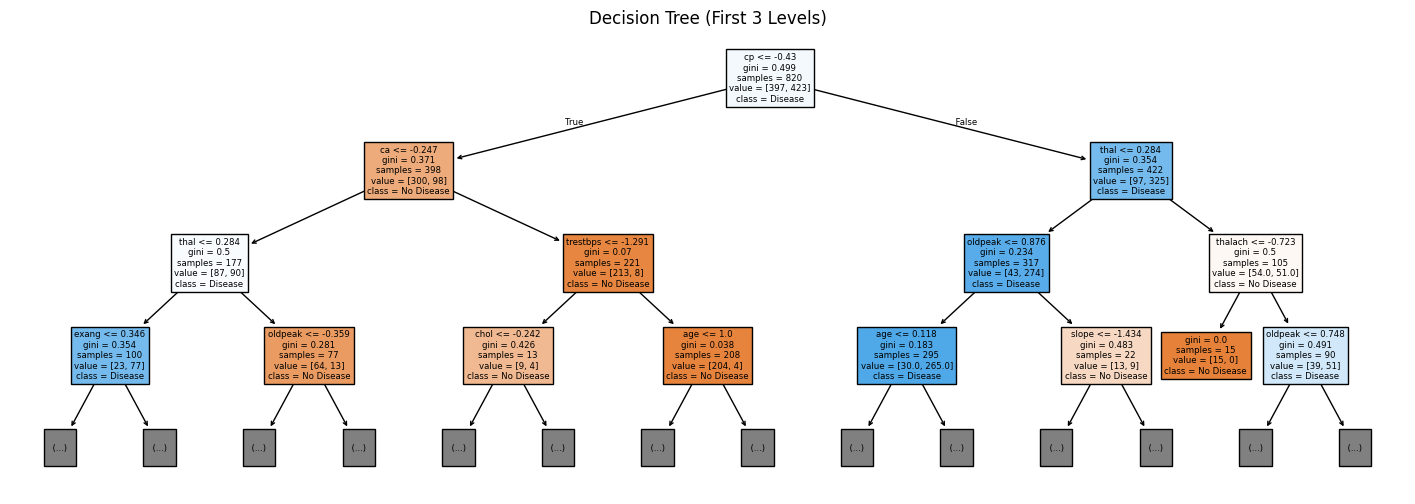

🌿 Pruned Tree Accuracy (max_depth=4): 0.8


In [16]:
#  Train Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

print("📊 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

#  Visualize Tree
plt.figure(figsize=(18, 6))
plot_tree(dt_clf, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

#  Prune Tree to Control Overfitting
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)

print("🌿 Pruned Tree Accuracy (max_depth=4):", accuracy_score(y_test, y_pred_pruned))

# Random Forest Classifier , Feature importances from random forest and Plot the Feature Importances.

🌲 Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



/tmp/ipython-input-17-2719936000.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df.head(10), palette="viridis")


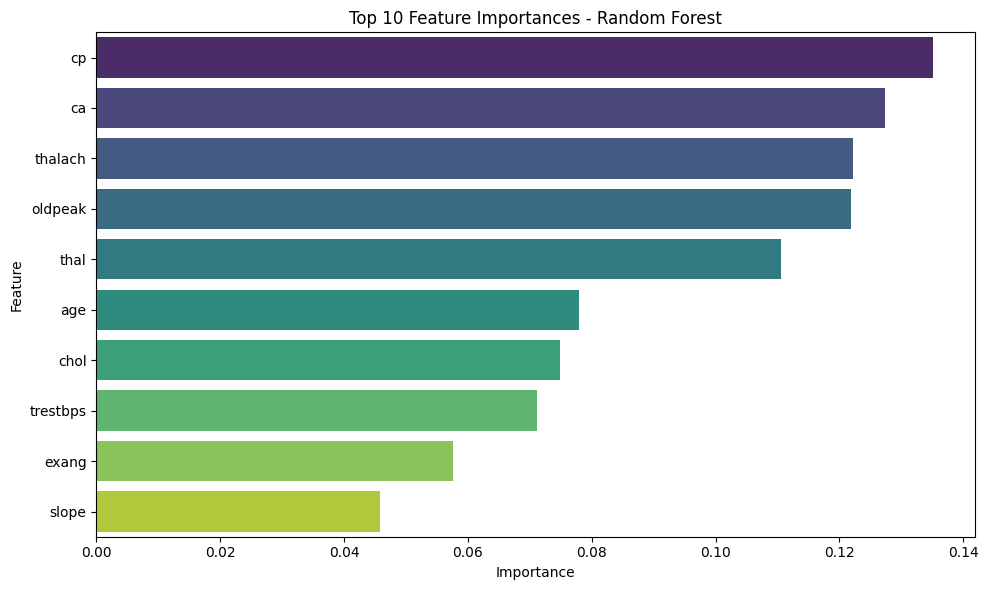

In [17]:
#  Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("🌲 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#  Feature Importances from Random Forest
importances = rf_clf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df.head(10), palette="viridis")
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

#Cross-Validation Scores.

In [18]:
# === 5. Cross-Validation Scores ===
cv_dt = cross_val_score(dt_pruned, X_scaled, y, cv=5).mean()
cv_rf = cross_val_score(rf_clf, X_scaled, y, cv=5).mean()

print(f"🔁 Cross-Validation Accuracy (Pruned Tree): {cv_dt:.4f}")
print(f"🔁 Cross-Validation Accuracy (Random Forest): {cv_rf:.4f}")


🔁 Cross-Validation Accuracy (Pruned Tree): 0.8341
🔁 Cross-Validation Accuracy (Random Forest): 0.9971
